# *Customers' Preference Analysis*
## Import Libraries

In [2]:
# Import required libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
# Reading the file using pandas
data=pd.read_excel("StoresData.xlsx")
data

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


In [4]:
# Basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [5]:
# Basic stats for numeric columns
print(data.describe())

        Store No.    Sales $m    Wages $m   No. Staff  Loc'n (Num)  \
count  150.000000  150.000000  150.000000  150.000000   150.000000   
mean    75.500000   11.659333    2.376667   61.493333     1.913333   
std     43.445368    3.570989    0.567866   14.605206     0.767954   
min      1.000000    5.900000    1.500000   35.000000     1.000000   
25%     38.250000    8.825000    1.900000   51.000000     1.000000   
50%     75.500000   10.950000    2.200000   58.000000     2.000000   
75%    112.750000   14.000000    2.700000   69.750000     2.750000   
max    150.000000   23.500000    3.900000  117.000000     3.000000   

       State (Num)   Age (Yrs)  GrossProfit   Adv.$'000  Competitors  ...  \
count   150.000000  150.000000   150.000000  150.000000   150.000000  ...   
mean      3.033333    8.846667     1.009953  147.273333     2.506667  ...   
std       1.894594    5.442483     0.645794   67.994265     1.744586  ...   
min       1.000000    1.000000     0.018000   20.000000     0

# Data Cleaning

In [6]:
# Checking for null values
print(data.isnull().sum())

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64


In [7]:
# Checking for duplicated data
print(data.duplicated().sum())

0


In [8]:
# Checking data types
data.dtypes

Store No.          int64
Sales $m         float64
Wages $m         float64
No. Staff          int64
Location          object
Loc'n (Num)        int64
State             object
State (Num)        int64
Age (Yrs)          int64
GrossProfit      float64
Adv.$'000          int64
Competitors        int64
HrsTrading         int64
Sundays           object
Sundays (Num)      int64
Mng-Sex           object
Mng-Sex (Num)      int64
Mng-Age            int64
Mng-Exp            int64
Mng-Train          int64
Union%             int64
Car Spaces         int64
HomeDel           object
HomeDel (Num)      int64
Basket:2013        int64
Basket:2014        int64
dtype: object

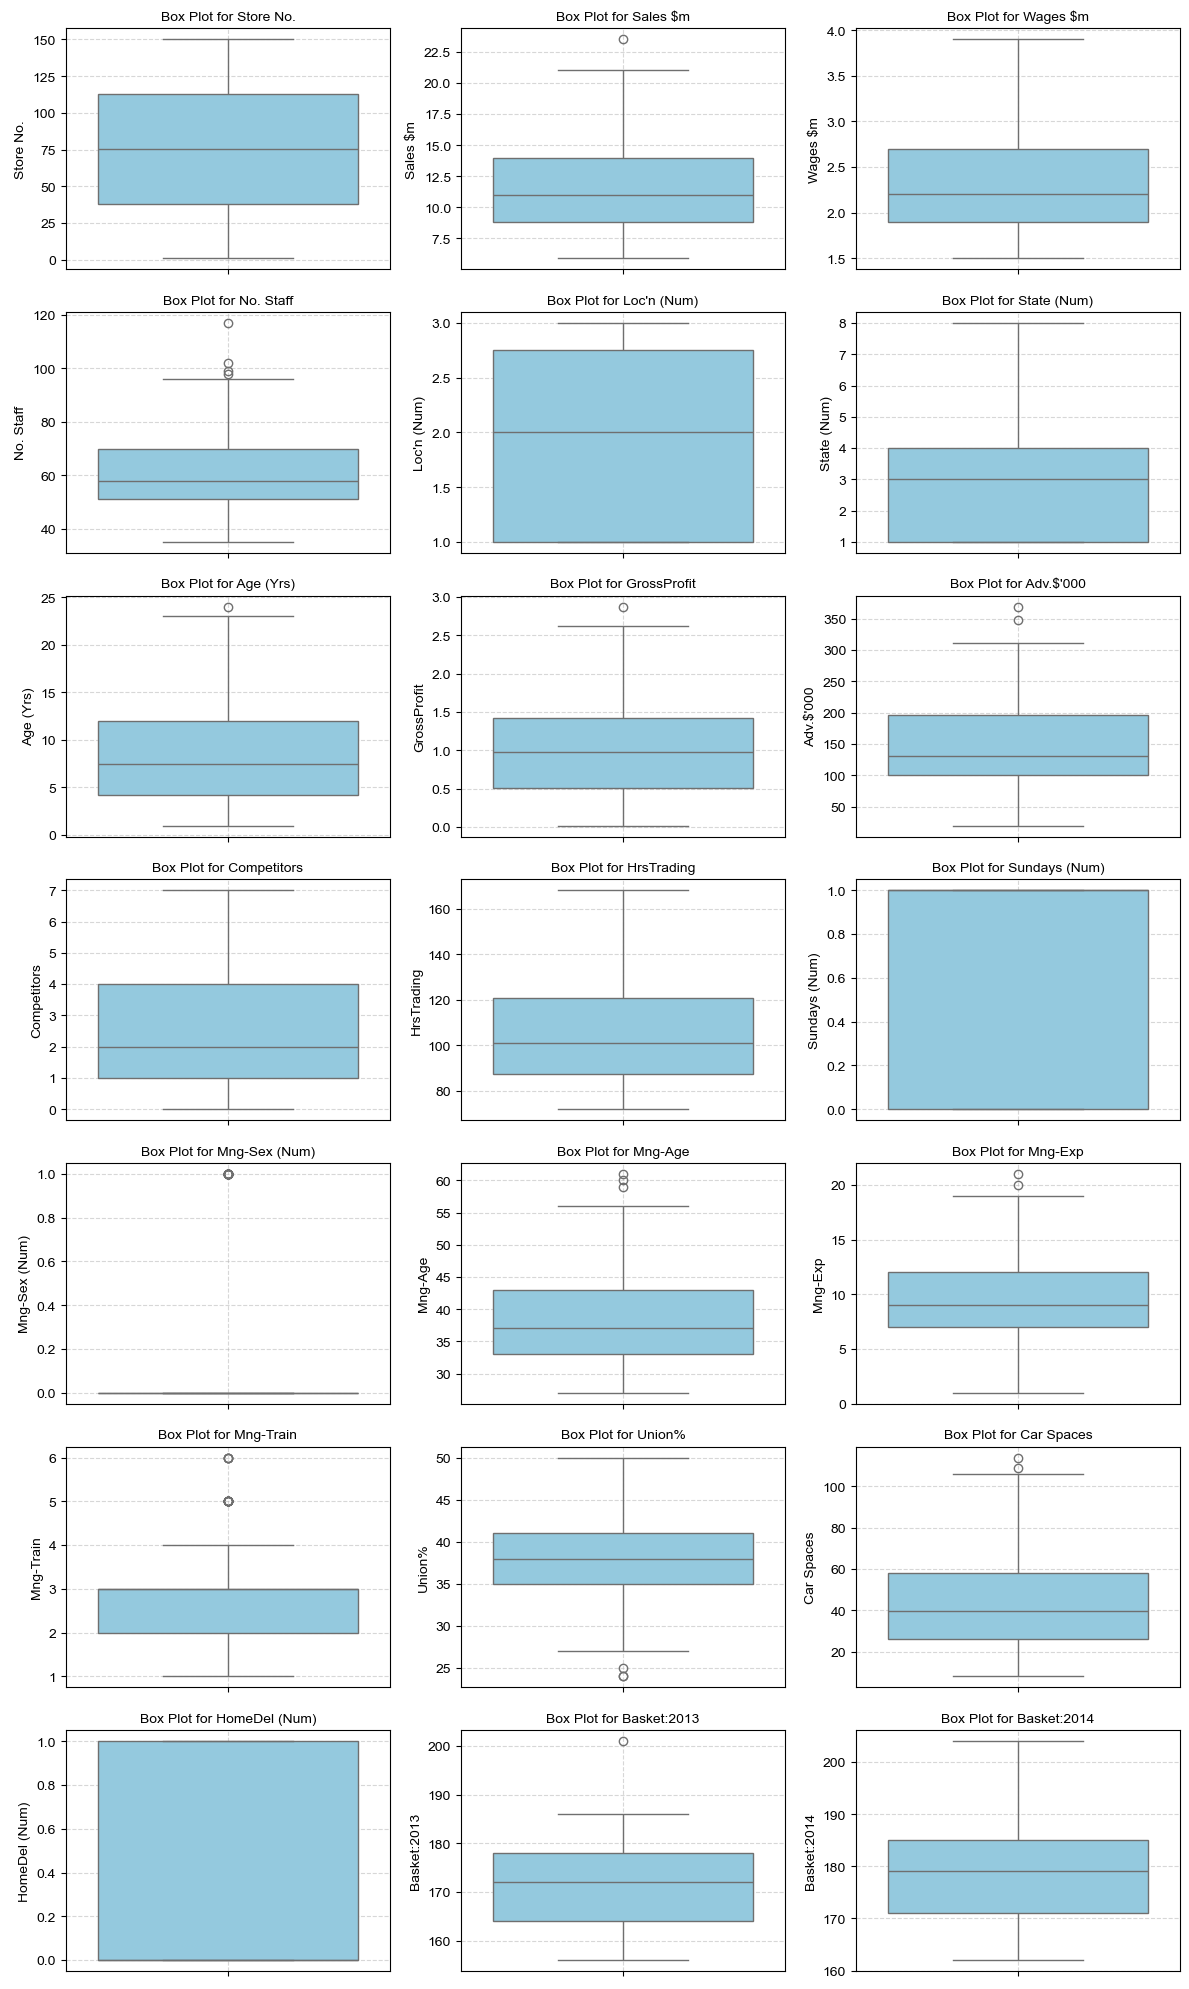

In [9]:
# Calculate the number of columns (let's use a fixed number of columns, for example, 4)
num_cols = 3

# Get a list of all numeric columns from your DataFrame
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed for the subplot layout
num_rows = (len(numerical_columns) // num_cols) + (1 if len(numerical_columns) % num_cols != 0 else 0)

# Set the figure size for the plots
plt.figure(figsize=(12, 20))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Define position in the subplot grid
    sns.boxplot(y=data[col], color='skyblue')  # Create a vertical box plot for the column
    plt.title(f'Box Plot for {col}', fontsize=10)  # Title for each plot
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Ensure the plots don't overlap
sns.set_style("darkgrid")
plt.show()  # Display all the plots

In [10]:
# Calculate the first (Q1) and third (Q3) quartiles for each numerical column
Q1 = data[numerical_columns].quantile(0.1)
Q3 = data[numerical_columns].quantile(0.85)
IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)

# Define the acceptable data limits (within 1.5 times the IQR)
filtered_df = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned data (after removing outliers)
filtered_df

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


## Data Normalization

In [11]:
# Initialize the MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Define numerical column that will be normalized
numerical_columns2 = [
    "Sales $m", "Wages $m", "No. Staff", "Age (Yrs)", "GrossProfit", "Adv.$'000",
    "Competitors", "HrsTrading", "Mng-Age", "Mng-Exp", "Union%", "Car Spaces",
    "Basket:2013", "Basket:2014"
]

# Apply MinMax scaling to the numerical columns
filtered_df[numerical_columns2] = scaler.fit_transform(filtered_df[numerical_columns2])

filtered_df = filtered_df[numerical_columns]

# Save the normalized DataFrame to a CSV file
filtered_df.to_csv('scaled_data_normalized.csv', index=False)

# Display the first 5 rows of the scaled DataFrame
print(filtered_df.head())

   Store No.  Sales $m  Wages $m  No. Staff  Loc'n (Num)  State (Num)  \
0          1  0.375000  0.333333   0.304878            2            1   
1          2  0.488636  0.500000   0.414634            2            2   
2          3  0.744318  0.666667   0.536585            3            2   
3          4  0.698864  0.458333   0.378049            2            3   
4          5  0.096591  0.208333   0.195122            1            3   

   Age (Yrs)  GrossProfit  Adv.$'000  Competitors  ...  Sundays (Num)  \
0   0.391304     0.243167   0.432665     0.428571  ...              0   
1   0.304348     0.025578   0.553009     0.714286  ...              0   
2   0.260870     0.370357   0.673352     0.285714  ...              1   
3   0.260870     0.474422   0.765043     0.142857  ...              1   
4   0.608696     0.746321   0.263610     0.000000  ...              1   

   Mng-Sex (Num)   Mng-Age  Mng-Exp  Mng-Train    Union%  Car Spaces  \
0              0  0.176471     0.55          2  0.

## Splitting dataset into train and test data 

In [12]:
data2 = pd.read_csv('scaled_data_normalized.csv')
print("Data loaded successfully.")

# Separate features and target
X = data2.drop(columns=['Basket:2014'])
y = data2['Basket:2014']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the splits to CSV files
X_train.to_csv('x_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Train data size:", X_train.shape)
print("Test data size:", X_test.shape)

print("Data split and saved successfully.")

Data loaded successfully.
Train data size: (120, 20)
Test data size: (30, 20)
Data split and saved successfully.


## **Application of Data Mining Techniques**

## fuzzy logic

In [ ]:
# 1. Data Loading & Preprocessing
# Load data
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

# Handle missing values
numeric_cols = ['Sales $m', 'Wages $m', "Loc'n (Num)"]
imputer = SimpleImputer(strategy='mean')

x_train[numeric_cols] = imputer.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = imputer.transform(x_test[numeric_cols])

In [ ]:
# 2. Enhanced Fuzzy System Setup
# Define antecedents with extended ranges
sales = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'sales')
wages = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'wages')
location = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'location')

# Define consequent with extended resolution
basket_2014 = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'basket_2014')

# Enhanced membership functions with overlap
sales['low'] = fuzz.trapmf(sales.universe, [0, 0, 0.25, 0.5])
sales['medium'] = fuzz.trapmf(sales.universe, [0.3, 0.45, 0.65, 0.8])
sales['high'] = fuzz.trapmf(sales.universe, [0.6, 0.75, 1, 1])

wages['low'] = fuzz.trapmf(wages.universe, [0, 0, 0.3, 0.55])
wages['medium'] = fuzz.trapmf(wages.universe, [0.4, 0.5, 0.7, 0.85])
wages['high'] = fuzz.trapmf(wages.universe, [0.65, 0.8, 1, 1])

location['strip'] = fuzz.trapmf(location.universe, [0, 0, 0.35, 0.6])
location['mall'] = fuzz.trapmf(location.universe, [0.4, 0.55, 0.75, 0.9])
location['country'] = fuzz.trapmf(location.universe, [0.7, 0.85, 1, 1])

basket_2014['small'] = fuzz.trapmf(basket_2014.universe, [0, 0, 0.2, 0.45])
basket_2014['medium'] = fuzz.trapmf(basket_2014.universe, [0.3, 0.5, 0.7, 0.9])
basket_2014['large'] = fuzz.trapmf(basket_2014.universe, [0.65, 0.8, 1, 1])

In [ ]:
# Comprehensive rule set
rules = [
    ctrl.Rule(sales['high'] & location['mall'], basket_2014['large']),
    ctrl.Rule(sales['medium'] & wages['low'], basket_2014['medium']),
    ctrl.Rule(location['strip'] & wages['high'], basket_2014['small']),
    ctrl.Rule(sales['low'] & location['country'], basket_2014['small']),
    ctrl.Rule(wages['medium'] & sales['medium'], basket_2014['medium']),
    ctrl.Rule(location['mall'] & wages['medium'], basket_2014['medium']),
    ctrl.Rule(sales['high'] & wages['high'], basket_2014['large']),
    ctrl.Rule(location['country'] & wages['low'], basket_2014['medium']),
    ctrl.Rule(sales['high'] & location['strip'], basket_2014['medium']),
    ctrl.Rule(wages['low'] & location['country'], basket_2014['small']),
    ctrl.Rule(sales['medium'] & location['strip'], basket_2014['medium']),
    ctrl.Rule(
        antecedent=(sales['low'] | sales['medium'] | sales['high']),
        consequent=basket_2014['medium'],
        label='universal_default'
    )
]

In [16]:
# 3. Robust Control System
basket_system = ctrl.ControlSystem(rules)
basket_sim = ctrl.ControlSystemSimulation(basket_system, cache=False, flush_after_run=100)

In [ ]:
# 4. Enhanced Prediction Function
def fuzzy_predict(X):
    predictions = []
    for idx, row in X.iterrows():
        try:
            sales_val = max(0, min(1, row['Sales $m']))
            wages_val = max(0, min(1, row['Wages $m']))
            loc_val = row["Loc'n (Num)"]
            if loc_val not in [0, 0.5, 1]:
                loc_val = round(loc_val * 2) / 2
            basket_sim.input['sales'] = sales_val
            basket_sim.input['wages'] = wages_val
            basket_sim.input['location'] = loc_val
            basket_sim.compute()
            output = max(0, min(1, basket_sim.output['basket_2014']))
            predictions.append(output)
            
        except Exception as e:
            print(f"Processing row {idx}: {str(e)}")
            predictions.append(0.5)
    return predictions

In [18]:
# 5. Execution & Evaluation
y_pred = fuzzy_predict(x_test)
mae = mean_absolute_error(y_test['Basket:2014'], y_pred)
rmse = np.sqrt(mean_squared_error(y_test['Basket:2014'], y_pred))

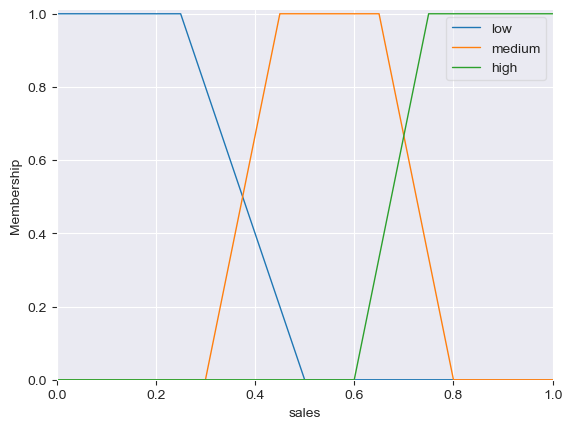

In [ ]:
# 6. Visualization Section
warnings.filterwarnings('ignore', category=UserWarning) 
sales.view()

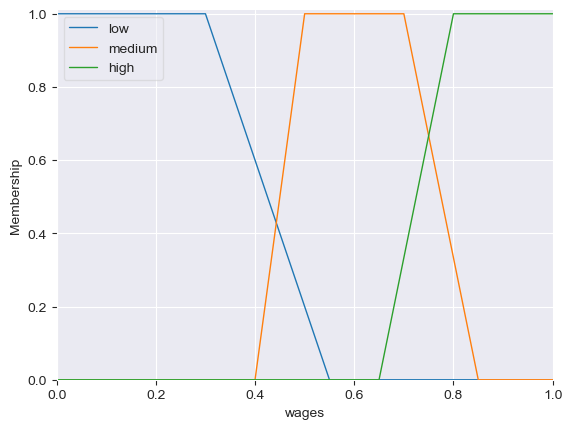

In [20]:
wages.view()

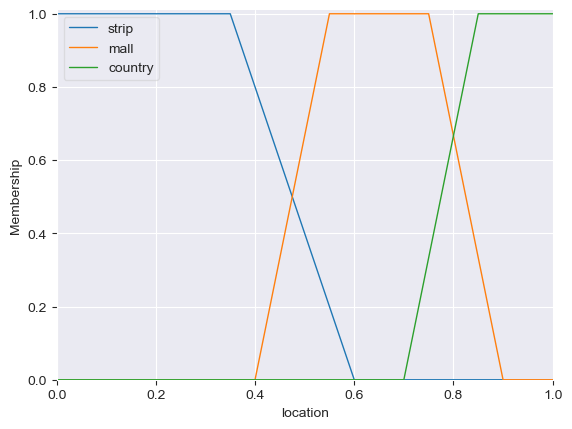

In [21]:
location.view()

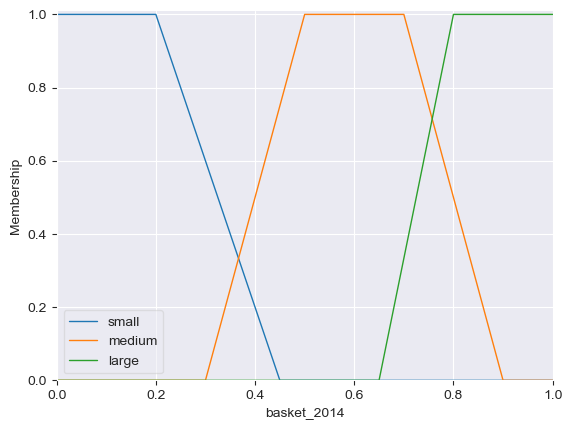

In [22]:
basket_2014.view()

## Evaluation metric of Fuzzy Logic

In [ ]:
# Display final performance metrics of the model
print("\nFinal Model Performance:")
print(f"- MAE (Mean Absolute Error): {mae:.4f}")  # Measures average magnitude of errors
print(f"- RMSE (Root Mean Squared Error): {rmse:.4f}")  # Penalizes larger errors more than MAE
print(f"- Coverage: {100 * len(y_pred)/len(x_test):.1f}%")  # Percentage of test instances predicted


Final Model Performance:
- MAE (Mean Absolute Error): 0.1657
- RMSE (Root Mean Squared Error): 0.2007
- Coverage: 100.0%


## Hierarchical Clustering

Text(0.5, 0, 'Cluster Size')

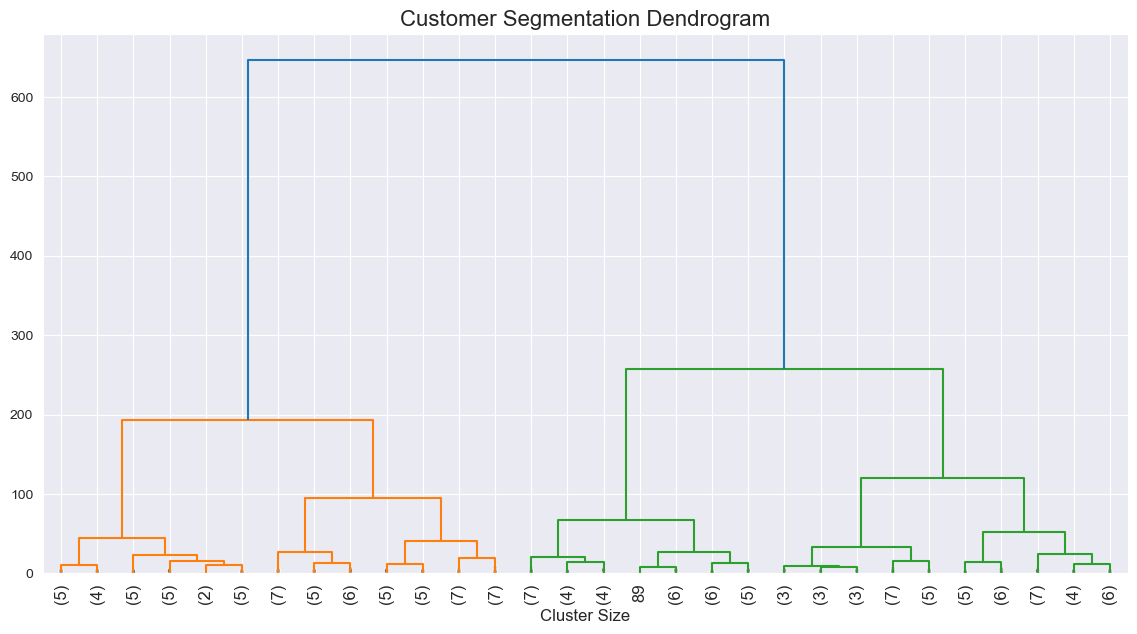

In [24]:
# Create linkage matrix using 'ward' method (minimizes variance)
linkage_matrix = linkage(data2, method='ward')

plt.figure(figsize=(14, 7))  # Wider plot
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=30,                   # Show the last 20 clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # Smaller branches are summarized
    color_threshold=0.7 * max(linkage_matrix[:, 2])  # Add colors
)
plt.title("Customer Segmentation Dendrogram", fontsize=16)
plt.xlabel("Cluster Size", fontsize=12)

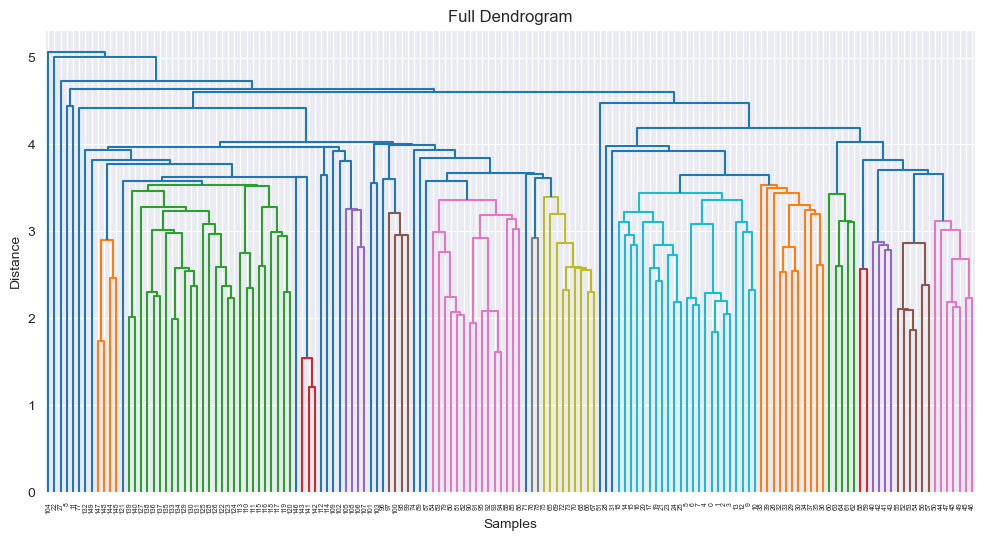

In [25]:
# Plots Full Dendrogram (Single)
linkage_matrix2 = linkage(data2, method='single')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix2)
plt.title('Full Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [26]:
# Choose the number of clusters
clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Add cluster labels to original data
data2['Cluster'] = clusters

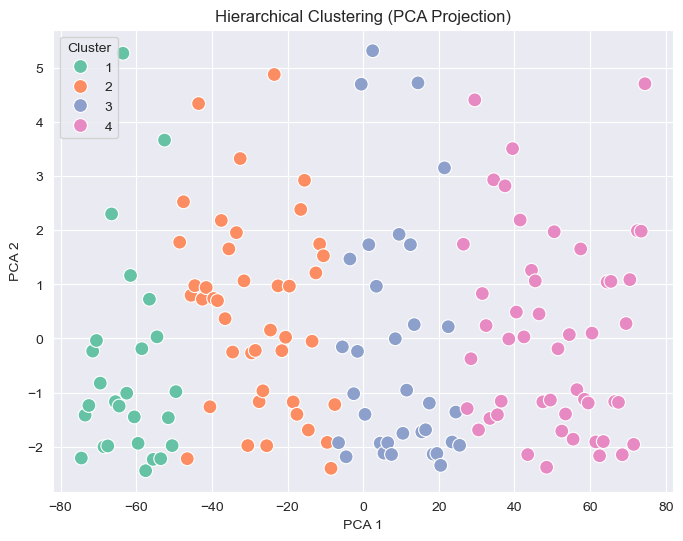

In [ ]:
# Visualize Clusters in 2D using PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X)  # Transform original data to 2D

plt.figure(figsize=(8,6))  # Set plot size
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2', s=100)  # Plot points with cluster colors
plt.title('Hierarchical Clustering (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')  # Show legend
plt.grid(True)  # Show grid
plt.show()

## Evaluation metric for Hierarchical Clustering

In [28]:
# Calculating silhouette score for Hierarchical Clustering (the closer to 1 the better)
# Removing the 'Cluster' column because when calculating silhouette score (only the features are needed)
X = data2.drop(columns='Cluster')
labels = data2['Cluster']
Score = silhouette_score(X, labels)
print("\n--- Evaluation Metrics for Hierarchical Clustering ---")
print("Silhouette Score",Score)


--- Evaluation Metrics for Hierarchical Clustering ---
Silhouette Score 0.512552519963494
